## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 25.02.2019

__Дедлайн:__ 23:59 5.03.2019

### О задании

В данном домашнем задании вы реализуете линейную регрессию своими руками и сравните её с версией в scikit-learn.

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_02_Фамилия_Имя.ipynb

## Часть 1. Обыкновенная линейная регрессия

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as norm
from sklearn import metrics
import copy
import warnings
from collections import defaultdict



### 1 (4 балла). 
На семинаре мы начали реализовывать класс линейной регрессии; теперь необходимо его закончить. 

In [1934]:
class LinReg():
    def __init__(self, step_size=0.01, num_steps=100, eps=1e-6):
        self.w = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
    
    def __calc_grad(self, X_train, y_train,temp):
        return (2*np.dot((X_train.T),(np.dot(X_train,temp)-y_train))) 

    
    def fit(self, X_train, y_train):
        w_0 = np.random.uniform(-1, 1, (X_train.shape[1]))

        for i in range(self.num_steps):
            w =w_0- self.step_size * np.dot(X_train.T, np.dot(X_train, w_0) - y_train) / y_train.shape[0]         
            if np.linalg.norm(w-w_0)<self.eps:
                break
            w_0=w
            self.w=w
    
    def predict(self, X_test):
        return np.dot(X_test, self.w)

### 2 (3 балла). 
Проверим корректность работы класса на датасете Boston Housing. 
* Загрузите его из sklearn
* Проведите предобработку данных(нормализация вещественных признаков, one-hot encoding категориальных)
* Разделите на обучение и контроль в соотношении 80:20 с random_seed 42 (самый популярный в прошлом задании)
* Обучите собственную реализацию регрессии и сравните по метрикам MAE и RMSE с LinearRegression из sklearn.

In [8]:
from sklearn.datasets import load_boston


In [9]:
data = load_boston()

In [10]:
#data.DESCR

In [11]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [12]:
target = data['target']

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
norm_df=norm.normalize(df)

In [1942]:
X_train, X_test, y_train, y_test = train_test_split(norm_df, target,test_size=0.20,random_state=42)

In [1943]:
lr=LinReg()

In [1944]:
lr.fit(X_train,y_train)

Средняя квадратичная и абсолютная ошибка линейной регрессии, реализованной самостоятельно

In [1915]:
print(mean_squared_error(y_test, lr.predict(X_test)),
metrics.mean_absolute_error(y_test, lr.predict(X_test)))

124.68529917717001 8.227307195535776


In [1916]:
lr_0=LinearRegression()

In [2081]:
lr_0?

In [1917]:
lr_0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Средняя квадратичная и абсолютная ошибка линейной регрессии, реализованной в скЛЁРНЕ

In [1918]:
print(mean_squared_error(y_test, lr_0.predict(X_test)),
metrics.mean_absolute_error(y_test, lr_0.predict(X_test)))

23.135562211711147 3.0618831088286966


Разница между собственным и скЛЁРНовский алгоритмом


In [1919]:
print(metrics.mean_squared_error(lr.predict(X_test),lr_0.predict(X_test)),
      metrics.mean_absolute_error(lr.predict(X_test),lr_0.predict(X_test))
      )

109.69927563766737 8.273346567260838


### 3 (3 балла). 
Линейная регрессия зачастую легко переобучается - модель необходимо штрафовать за величину весов; для этого применяют L1 и L2 регуляризацию: добавление нормы весов к функции потерь. В случае L2-регулязации функционал будет выглядеть как

$$ L = (Xw - y)^T(Xw - y) + \lambda||w||_2 $$.

Параметр $\lambda$ подбирается на отложенной выборке или по кросс-валидации.

* Реализуйте обучение линейной регрессии с L2-регуляризацией
* Найдите оптимальный с точки зрения метрики MAE коэффициент $\lambda$ (по кросс-валидации)
* Постройте график зависимости метрики на тестовой выборке от $\lambda$ (__подпишите оси__)
* Сравните результаты с Ridge регрессией из sklearn (аналогично пункту 2).

In [51]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [101]:
class LinReg():
    def __init__(self, step_size=0.01, num_steps=100, eps=1e-6,l=-2):
        self.w = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.l=l
    
    def __calc_grad(self, X_train, y_train,temp):
        return (2*np.dot((X_train.T),(np.dot(X_train,temp)-y_train))) 

    
    def fit(self, X_train, y_train):
        w_0 = np.random.uniform(-1, 1, (X_train.shape[1]))
        for i in range(self.num_steps):
            w =w_0- self.step_size * np.dot(X_train.T, np.dot(X_train, w_0) - y_train) / y_train.shape[0]+self.l*(np.linalg.norm(w_0)/ y_train.shape[0])**2     
            if np.linalg.norm(w-w_0)<self.eps:
                break
            w_0=w
            self.w=w
     
    
    def predict(self, X_test):
        return np.dot(X_test, self.w)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(norm_df, target,test_size=0.20,random_state=42)

In [103]:
lr=LinReg(l=0.5)

ошибка с начальной регуляризацией 0,5

In [104]:
lr.fit(X_train,y_train)

In [105]:
print(mean_squared_error(y_test, lr.predict(X_test)),
metrics.mean_absolute_error(y_test, lr.predict(X_test)))

125.59705750510163 8.28021466211407


написал свою кроссвалидацию......

In [106]:
itog=[]
lll=[]
acc=[]
k=-2
for i in range(100):
    kf = KFold(n_splits=5)
    acc=[]

    lr=LinReg(l=k)
    for train_index, test_index in kf.split(X_train):
        X_trai, X_tes = X_train[train_index], X_train[test_index]
        y_trai, y_tes = target[train_index], target[test_index]
        lr.fit(X_trai,y_trai)
        acc.append(mean_squared_error(lr.predict(X_tes),y_tes))
    lll.append(lr.l)
    itog.append(min(acc))
    k=k+0.04

Text(0,0.5,'L2_parametr')

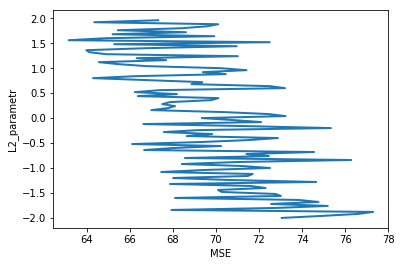

In [107]:
plt.plot(itog,lll, label='line 1', linewidth=2)
plt.xlabel('MSE')
plt.ylabel('L2_parametr')

Оптимальный коэфф регуляризации

In [100]:
itog=np.array(itog)
lll=np.array(lll)
lll[itog.argmin()]

1.2800000000000018

In [ ]:
rid=Ridge()

In [ ]:
rid.fit(X_train,y_train)

сравнение ошибок, как в пунктике ранее

In [2280]:
print(mean_squared_error(y_test, rid.predict(X_test)),
metrics.mean_absolute_error(y_test, rid.predict(X_test)))

46.752165691372866 4.913531062757424


In [2281]:
print(metrics.mean_squared_error(lr.predict(X_test),rid.predict(X_test)),
      metrics.mean_absolute_error(lr.predict(X_test),rid.predict(X_test))
      )

36.7114193262865 4.898300823710395


### 4 (Бонус, 4 балла). 
* Реализуйте обучение линейной регрессии с L1-регуляризацией (класс RegL1)
* Проведите сравнения аналогично пункту 3 (но с Lasso вместо Ridge).

In [109]:
class LinReg():
    def __init__(self, step_size=0.01, num_steps=100, eps=1e-6,l=-2):
        self.w = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.l=l
    
    def __calc_grad(self, X_train, y_train,temp):
        return (2*np.dot((X_train.T),(np.dot(X_train,temp)-y_train))) 

    
    def fit(self, X_train, y_train):
        w_0 = np.random.uniform(-1, 1, (X_train.shape[1]))
        for i in range(self.num_steps):
            w =w_0- self.step_size * np.dot(X_train.T, np.dot(X_train, w_0) - y_train) / y_train.shape[0]+self.l*(abs(np.linalg.norm(w_0))/ y_train.shape[0])    
            if np.linalg.norm(w-w_0)<self.eps:
                break
            w_0=w
            self.w=w
     
    
    def predict(self, X_test):
        return np.dot(X_test, self.w)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(norm_df, target,test_size=0.20,random_state=42)

In [111]:
lr=LinReg(l=0.5)

In [112]:
lr.fit(X_train,y_train)

In [113]:
print(mean_squared_error(y_test, lr.predict(X_test)),
metrics.mean_absolute_error(y_test, lr.predict(X_test)))

103.5883767428414 7.224489687531786


In [114]:
itog=[]
lll=[]
acc=[]
k=-2
for i in range(100):
    kf = KFold(n_splits=5)
    acc=[]

    lr=LinReg(l=k)
    for train_index, test_index in kf.split(X_train):
        X_trai, X_tes = X_train[train_index], X_train[test_index]
        y_trai, y_tes = target[train_index], target[test_index]
        lr.fit(X_trai,y_trai)
        acc.append(mean_squared_error(lr.predict(X_tes),y_tes))
    lll.append(lr.l)
    itog.append(min(acc))
    k=k+0.04

Text(0,0.5,'L2_parametr')

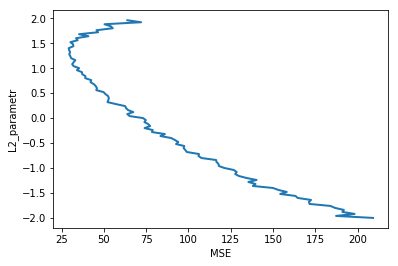

In [115]:
plt.plot(itog,lll, label='line 1', linewidth=2)
plt.xlabel('MSE')
plt.ylabel('L2_parametr')

In [116]:
itog=np.array(itog)
lll=np.array(lll)
lll[itog.argmin()]

1.400000000000002

In [117]:
rid=Lasso()

In [118]:
rid.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [119]:
print(mean_squared_error(y_test, rid.predict(X_test)),
metrics.mean_absolute_error(y_test, rid.predict(X_test)))

75.04543037399255 6.255843525529023


In [120]:
print(metrics.mean_squared_error(lr.predict(X_test),rid.predict(X_test)),
      metrics.mean_absolute_error(lr.predict(X_test),rid.predict(X_test))
      )

34.01505508999917 5.652248418432491


### 5 (Бонус, 2 балла). 
Исследуйте для реализации регрессии с L2-регуляризацией зависимость качества на тестовой выборке (с графиками) от:
* Длины шага
* Количества шагов спуска
* Константы epsilon.

### 6 (Бонус, 0 баллов). 
Вставьте сюда любимую картинку, которая сможет поднять настроение ассистенту и семинаристу

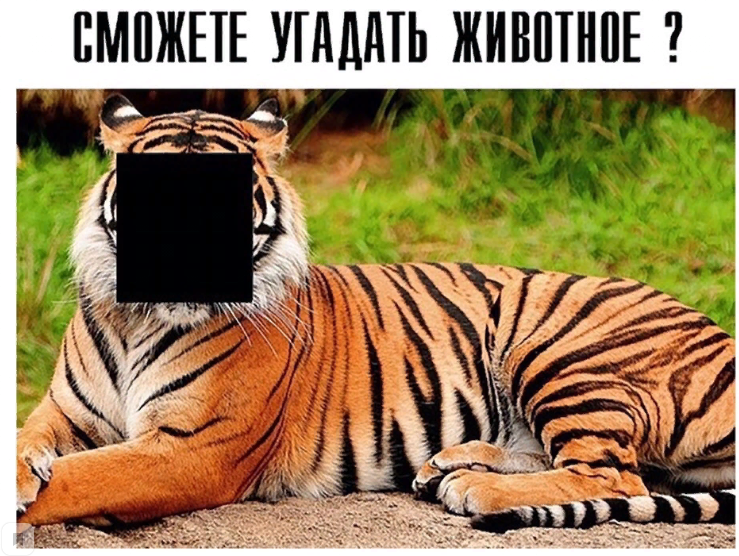

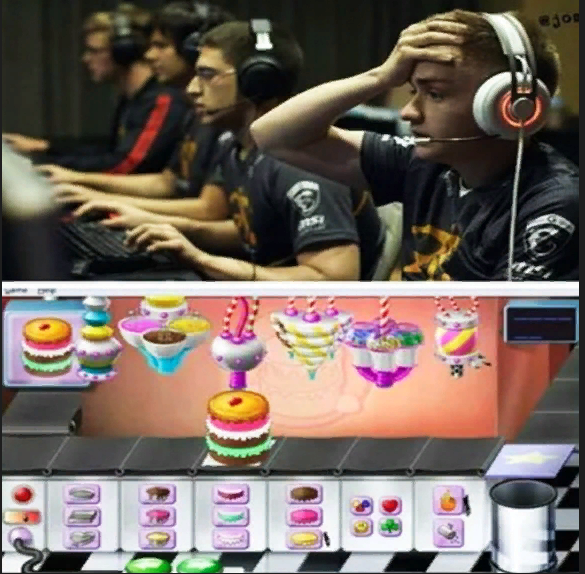